In [13]:
import pandas as pd

# Load the dataset
data = pd.read_csv('phishing_data.csv')
print(data.head())  # Inspect the dataset


   index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0      1                          -1              1                   1   
1      2                           1              1                   1   
2      3                           1              0                   1   
3      4                           1              0                   1   
4      5                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                 -1              -1                           -1  ...   
1               

In [14]:
data = data.dropna()  # Drop rows with missing values


In [15]:
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_special_chars'] = sum([1 for char in url if char in ['@', '-', '.']])
    features['has_https'] = 1 if 'https' in url else 0
    return features


In [16]:
print(data.columns)


Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')


In [17]:
print(data['Request_URL'].head())


0    1
1    1
2    1
3   -1
4    1
Name: Request_URL, dtype: int64


In [18]:
print(data['URL_of_Anchor'].head())


0   -1
1    0
2    0
3    0
4    0
Name: URL_of_Anchor, dtype: int64


In [20]:
data = data.drop(['index'], axis=1)  # Drop unnecessary columns


In [21]:
X = data.drop('Result', axis=1)  # All feature columns
y = data['Result']  # Target column


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.9665309814563546


Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211



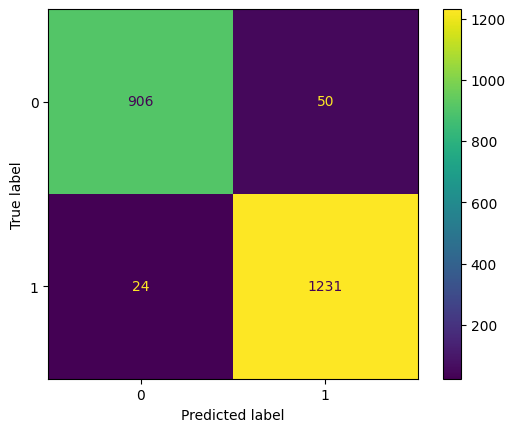

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


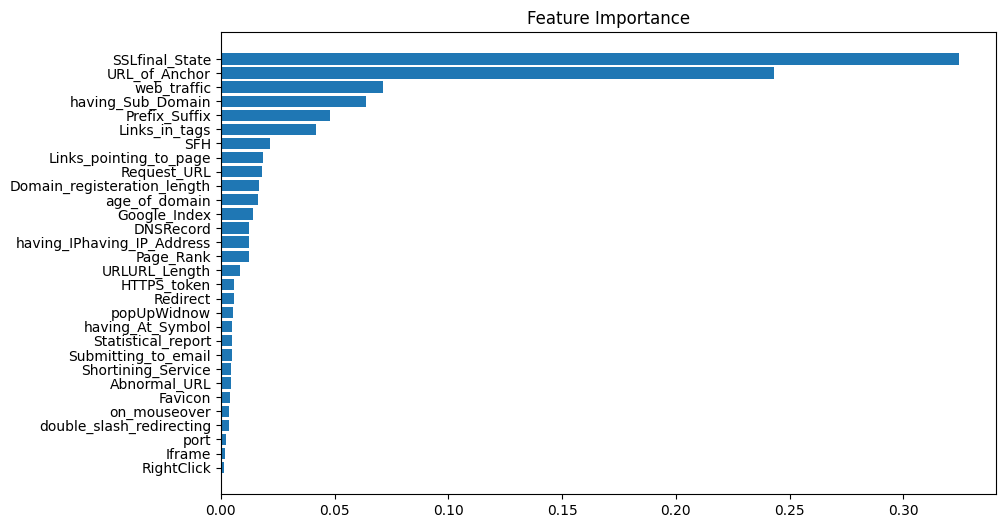

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Reverse order for readability
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print(f"Logistic Regression Accuracy: {log_model.score(X_test, y_test)}")


Logistic Regression Accuracy: 0.924468566259611


In [28]:
import joblib
joblib.dump(model, 'phishing_detector.pkl')


['phishing_detector.pkl']

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train the optimized model
optimized_model = RandomForestClassifier(
    max_depth=None,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
optimized_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_optimized = optimized_model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized)}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimized)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9669832654907282
Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Confusion Matrix:
[[ 909   47]
 [  26 1229]]


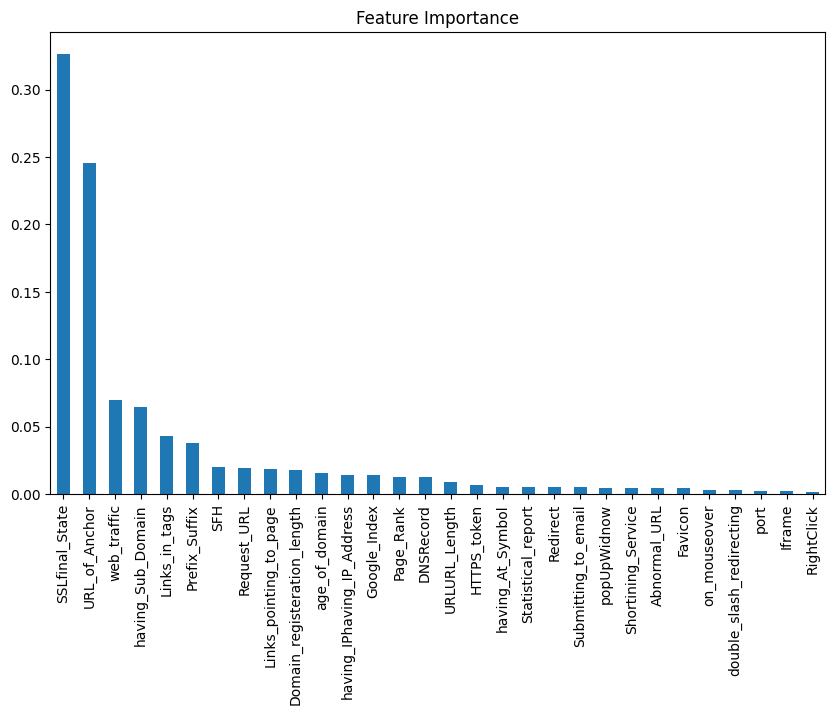

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    optimized_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Plot
feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


In [32]:
print(model.feature_names_in_)  # Prints all feature names the model was trained on


['having_IPhaving_IP_Address' 'URLURL_Length' 'Shortining_Service'
 'having_At_Symbol' 'double_slash_redirecting' 'Prefix_Suffix'
 'having_Sub_Domain' 'SSLfinal_State' 'Domain_registeration_length'
 'Favicon' 'port' 'HTTPS_token' 'Request_URL' 'URL_of_Anchor'
 'Links_in_tags' 'SFH' 'Submitting_to_email' 'Abnormal_URL' 'Redirect'
 'on_mouseover' 'RightClick' 'popUpWidnow' 'Iframe' 'age_of_domain'
 'DNSRecord' 'web_traffic' 'Page_Rank' 'Google_Index'
 'Links_pointing_to_page' 'Statistical_report']


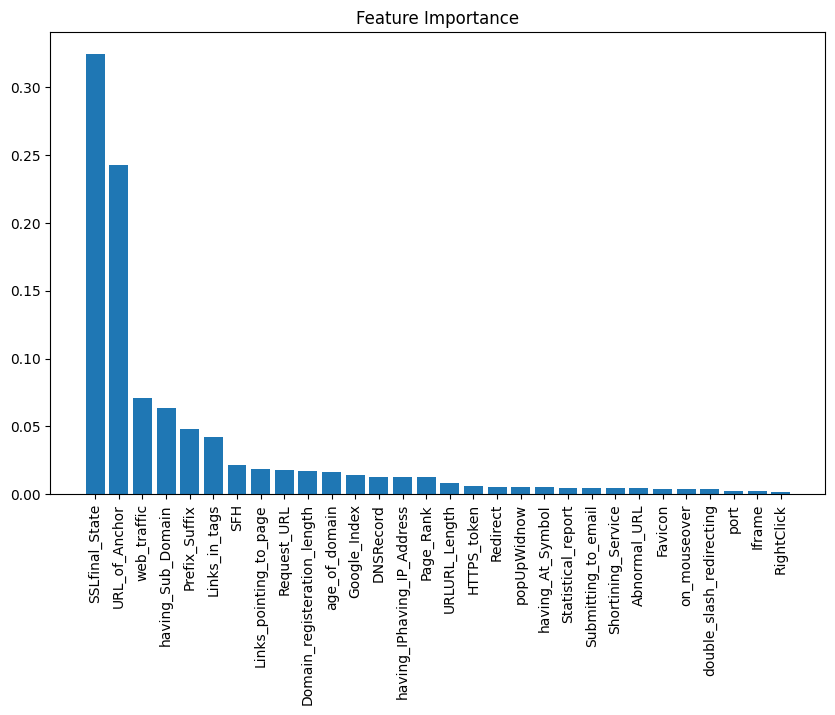

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names from the model
feature_names = model.feature_names_in_
feature_importance = model.feature_importances_

# Plotting
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(indices)), feature_importance[indices], align="center")
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.title("Feature Importance")
plt.show()


In [34]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.2f}")


Cross-Validation Accuracy: 0.97


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
model = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [38]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



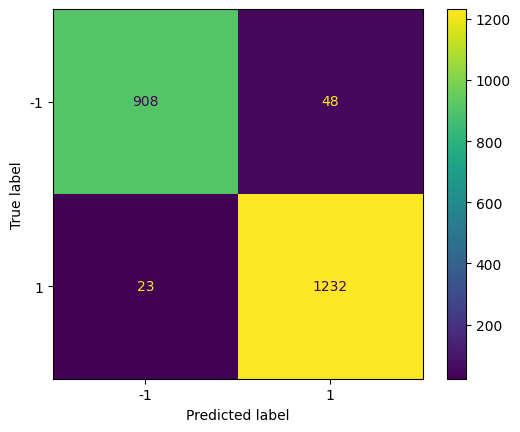

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [40]:
import joblib

joblib.dump(model, 'phishing_detector_v2.pkl')


['phishing_detector_v2.pkl']